### Linear Regression

In [1]:
# Imports
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas
import math
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
#BIC for Linear Regression
def bic(n, rss, q):
    # Degrees of freedom is equal to number of parameters + 2 (the + 2 accounts for our additional free variables, being intercept and variance)
    k = q + 2
    return n * math.log(rss / n) + k * math.log(n)


### Problem 5A

*** No CODEPAGE record, no encoding_override: will use 'ascii'
Residual sum of squares for classifer based on X1: 1456.18
BIC:  111.27397294939045
Residual sum of squares for classifer based on X2: 1888.14
BIC:  117.76847207730296
Residual sum of squares for classifer based on X3: 757.28
BIC:  94.92820649521937


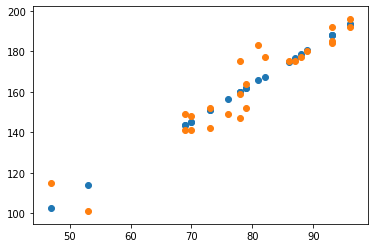

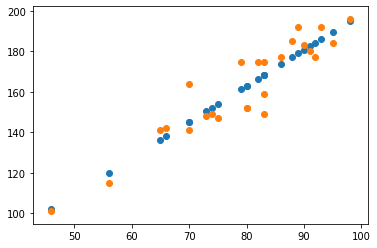

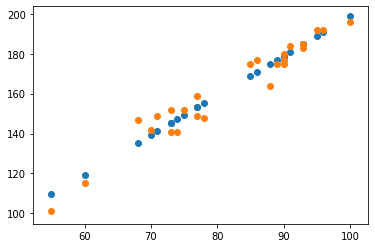

In [3]:
# Load data
data = pandas.read_excel('data.xls')

X1 = data.to_numpy()[:, 0].reshape(-1, 1)
X2 = data.to_numpy()[:, 1].reshape(-1, 1)
X3 = data.to_numpy()[:, 2].reshape(-1, 1)
y = data.to_numpy()[:, 3]
labels = ["X1", "X2", "X3"]
idx = 0
# Iterate through different X values and fit linear predictors based off of them
for X in [X1, X2, X3]:
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y)
    
    y_predict = model.predict(X.reshape(-1, 1) )

    plt.figure()
    plt.scatter(X[:, 0], y_predict)
    plt.scatter(X[:, 0], y)
    rss = ((y - y_predict) ** 2).sum()
    print("Residual sum of squares for classifer based on %s: %.2f"% (labels[idx], rss))
    print("BIC: ", bic(len(y), rss, 1))
    idx += 1


### Problem 5B

In [4]:
# Iterate through different X values and fit linear predictors based off of them
X1X2 = data.to_numpy()[:, 0:2]
X1X3 = data.to_numpy()[:, 0:3:2]
X2X3 = data.to_numpy()[:, 1:3]
labels = ["X1, X2", "X1, X3", "X2, X3"]
idx = 0

for X in [X1X2, X1X3, X2X3]:
    model = LinearRegression()
    model.fit(X, y)
    y_predict = model.predict(X)
    rss = ((y - y_predict) ** 2).sum()
    print("Residual sum of squares for classifer based on %s: %.2f"% (labels[idx], rss))
    print("BIC: ", bic(len(y), rss, 2))
    idx += 1


Residual sum of squares for classifer based on X1, X2: 1020.74
BIC:  105.6107058955927
Residual sum of squares for classifer based on X1, X3: 341.12
BIC:  78.20938820935169
Residual sum of squares for classifer based on X2, X3: 202.17
BIC:  65.13193847609297


### Problem 5C

In [5]:
X = data.to_numpy()[:, :-1]
model = LinearRegression()
model.fit(X, y)
y_predict = model.predict(X)
rss = ((y - y_predict) ** 2).sum()
print("Residual sum of squares for classifer based on X1, X2, X3: %.2f"% ((y - y_predict) ** 2).sum()) 
print("BIC: ", bic(len(y), rss, 3))

Residual sum of squares for classifer based on X1, X2, X3: 143.45
BIC:  59.771306791880484


### Problem 5D
The model constructed in Part C, which uses all 3 variables, is the best model because it has the lowest RSS (143.45) of any model (compared to the next best model at 202.17). If we perform the Bayes Factor calculation with the 3-variable model BIC and any of the other models BIC, we find that the resulting value supports the selection of the model using all 3 variables. For the next best model, we still find weak evidence for the 3-variable model.